# **Deploying Predictive Model for New York Housing Prices**

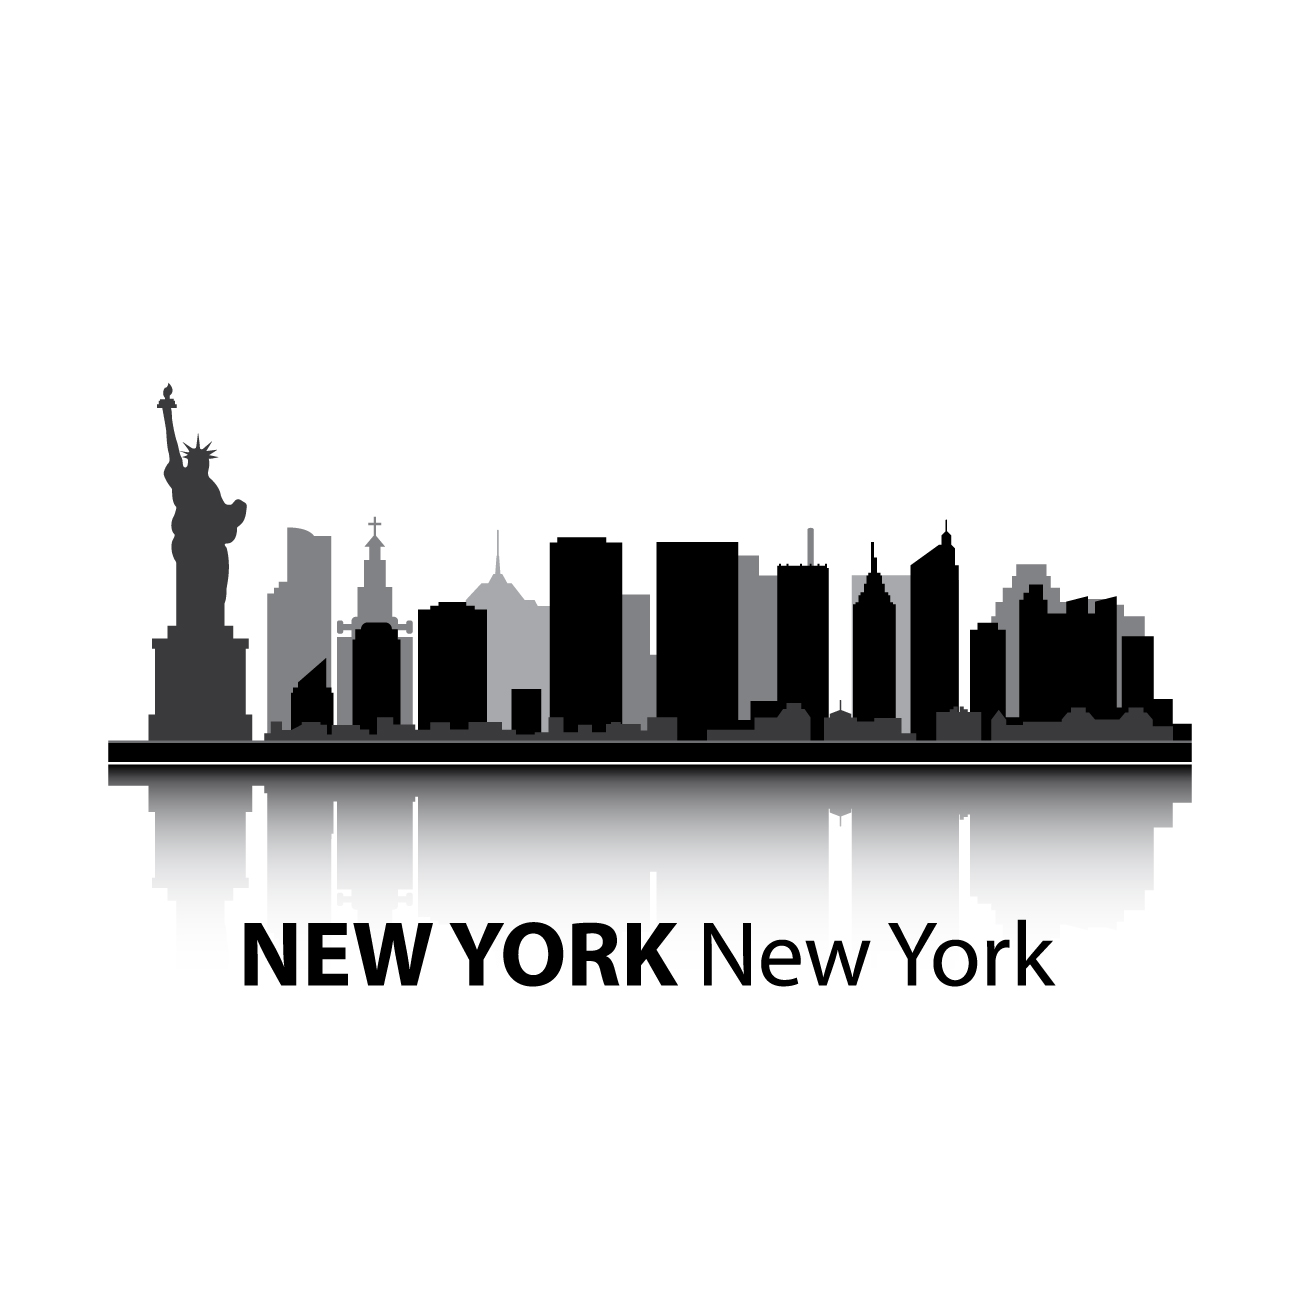

## Introduction

The deployment of predictive models holds immense potential for various industries, including real estate, where data-driven insights can revolutionize decision-making processes. In line with this, our project, titled "Deploying Predictive Model for New York Housing Prices," focuses on the deployment of a machine learning model to predict property prices in the vibrant real estate market of New York City.

## Description of Project

Our project revolves around the development and deployment of a predictive model designed to estimate property prices in different neighborhoods across New York City. Leveraging a comprehensive dataset encompassing various property attributes and historical transaction data, we employ machine learning algorithms to build an accurate predictive model. The deployment aspect of the project involves making this model accessible via a web-based platform, allowing stakeholders to obtain property price estimates in real-time.

## Objective of the Project

The primary objective of our project is to deploy a robust predictive model for estimating housing prices in New York City. Specifically, our goals include:

Developing an accurate machine learning model capable of predicting property prices based on relevant features such as location, size, and amenities.
Implementing a user-friendly web interface for accessing the deployed model, enabling stakeholders to obtain property price estimates seamlessly.
Providing a valuable tool for homebuyers, sellers, investors, and other stakeholders to make informed decisions in the dynamic New York housing market.

## Research Question

The central focus of our project centers on addressing the following research question:

How can we deploy a predictive model effectively to estimate property prices in the diverse and competitive real estate market of New York City, and how will stakeholders benefit from its implementation?

In [ ]:
!pip install --q sweetviz

In [ ]:
!pip install --q -U ydata-profiling

In [ ]:
!pip install --q -U ydata-profiling[notebook]

In [ ]:
!pip install -q opendatasets

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import opendatasets as od
import sweetviz as sv
from ydata_profiling import ProfileReport

from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

In [ ]:
# Import our dataset straight from kaggle
od.download('https://www.kaggle.com/datasets/nelgiriyewithana/new-york-housing-market/download?datasetVersionNumber=1')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: kostas696
Your Kaggle Key: ··········


100%|██████████| 271k/271k [00:00<00:00, 46.9MB/s]

In [ ]:
# Load and read our dataset
ny_house_data = pd.read_csv("/content/new-york-housing-market/NY-House-Dataset.csv")
ny_house_data.head()

BROKERTITLE                TYPE  \
0        Brokered by Douglas Elliman  -111 Fifth Ave      Condo for sale   
1                                Brokered by Serhant      Condo for sale   
2                             Brokered by Sowae Corp      House for sale   
3                                Brokered by COMPASS      Condo for sale   
4  Brokered by Sotheby's International Realty - E...  Townhouse for sale   

       PRICE  BEDS       BATH  PROPERTYSQFT  \
0     315000     2   2.000000        1400.0   
1  195000000     7  10.000000       17545.0   
2     260000     4   2.000000        2015.0   
3      69000     3   1.000000         445.0   
4   55000000     7   2.373861       14175.0   

                                             ADDRESS                    STATE  \
0                               2 E 55th St Unit 803       New York, NY 10022   
1  Central Park Tower Penthouse-217 W 57th New Yo...       New York, NY 10019   
2                                   620 Sinclair Ave  Staten Island, NY 10312   
3                            2 E 55th St Unit 908W33      Manhattan, NY 10022   
4                                        5 E 64th St       New York, NY 10065   

                                        MAIN_ADDRESS  \
0             2 E 55th St Unit 803New York, NY 10022   
1  Central Park Tower Penthouse-217 W 57th New Yo...   
2            620 Sinclair AveStaten Island, NY 10312   
3         2 E 55th St Unit 908W33Manhattan, NY 10022   
4                      5 E 64th StNew York, NY 10065   

  ADMINISTRATIVE_AREA_LEVEL_2  LOCALITY      SUBLOCALITY       STREET_NAME  \
0             New York County  New York        Manhattan  East 55th Street   
1               United States  New York  New York County          New York   
2               United States  New York  Richmond County     Staten Island   
3               United States  New York  New York County          New York   
4               United States  New York  New York County          New York   

          LONG_NAME                                  FORMATTED_ADDRESS  \
0   Regis Residence  Regis Residence, 2 E 55th St #803, New York, N...   
1  West 57th Street             217 W 57th St, New York, NY 10019, USA   
2   Sinclair Avenue     620 Sinclair Ave, Staten Island, NY 10312, USA   
3  East 55th Street               2 E 55th St, New York, NY 10022, USA   
4  East 64th Street               5 E 64th St, New York, NY 10065, USA   

    LATITUDE  LONGITUDE  
0  40.761255 -73.974483  
1  40.766393 -73.980991  
2  40.541805 -74.196109  
3  40.761398 -73.974613  
4  40.767224 -73.969856

In [ ]:
# Check the unique values of BATH
ny_house_data['BATH'].unique()

array([ 2.        , 10.        ,  1.        ,  2.37386086, 16.        ,
        3.        ,  4.        ,  6.        ,  8.        ,  5.        ,
        9.        ,  7.        , 32.        , 13.        , 50.        ,
       20.        , 11.        , 12.        , 24.        , 43.        ,
        0.        , 17.        ])

In [ ]:
# Change the data type of BATH to integer
ny_house_data['BATH'] = ny_house_data['BATH'].astype(int)

In [ ]:
# Check the data types of our columns
ny_house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4801 entries, 0 to 4800
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   BROKERTITLE                  4801 non-null   object 
 1   TYPE                         4801 non-null   object 
 2   PRICE                        4801 non-null   int64  
 3   BEDS                         4801 non-null   int64  
 4   BATH                         4801 non-null   int64  
 5   PROPERTYSQFT                 4801 non-null   float64
 6   ADDRESS                      4801 non-null   object 
 7   STATE                        4801 non-null   object 
 8   MAIN_ADDRESS                 4801 non-null   object 
 9   ADMINISTRATIVE_AREA_LEVEL_2  4801 non-null   object 
 10  LOCALITY                     4801 non-null   object 
 11  SUBLOCALITY                  4801 non-null   object 
 12  STREET_NAME                  4801 non-null   object 
 13  LONG_NAME         

In [ ]:
# Descriptive statistics of our dataset
ny_house_data.describe()

PRICE         BEDS         BATH  PROPERTYSQFT     LATITUDE  \
count  4.801000e+03  4801.000000  4801.000000   4801.000000  4801.000000   
mean   2.356940e+06     3.356801     2.350344   2184.207862    40.714227   
std    3.135525e+07     2.602315     1.949077   2377.140894     0.087676   
min    2.494000e+03     1.000000     0.000000    230.000000    40.499546   
25%    4.990000e+05     2.000000     1.000000   1200.000000    40.639375   
50%    8.250000e+05     3.000000     2.000000   2184.207862    40.726749   
75%    1.495000e+06     4.000000     3.000000   2184.207862    40.771923   
max    2.147484e+09    50.000000    50.000000  65535.000000    40.912729   

         LONGITUDE  
count  4801.000000  
mean    -73.941601  
std       0.101082  
min     -74.253033  
25%     -73.987143  
50%     -73.949189  
75%     -73.870638  
max     -73.702450

In [ ]:
# Descriptive statistics of our target variable
ny_house_data['PRICE'].describe()

count    4.801000e+03
mean     2.356940e+06
std      3.135525e+07
min      2.494000e+03
25%      4.990000e+05
50%      8.250000e+05
75%      1.495000e+06
max      2.147484e+09
Name: PRICE, dtype: float64

In [ ]:
# Use the power of sweetviz library to understand our data
my_report = sv.analyze(ny_house_data)
my_report.show_html('ny_house_data.html')

                                             |          | [  0%]   00:00 -> (? left)

Report ny_house_data.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.



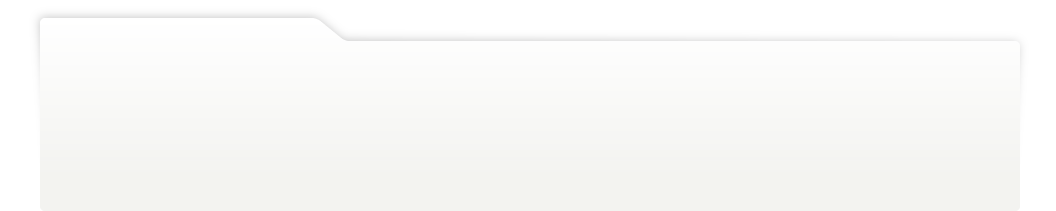
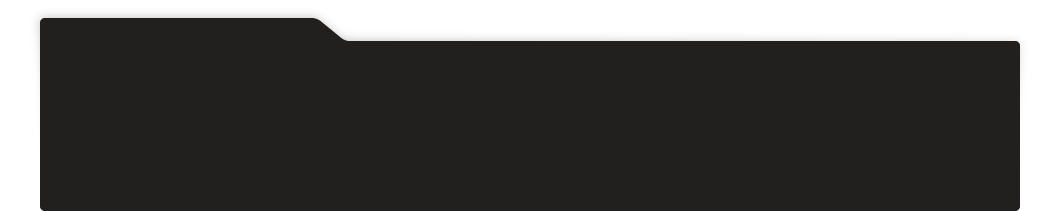
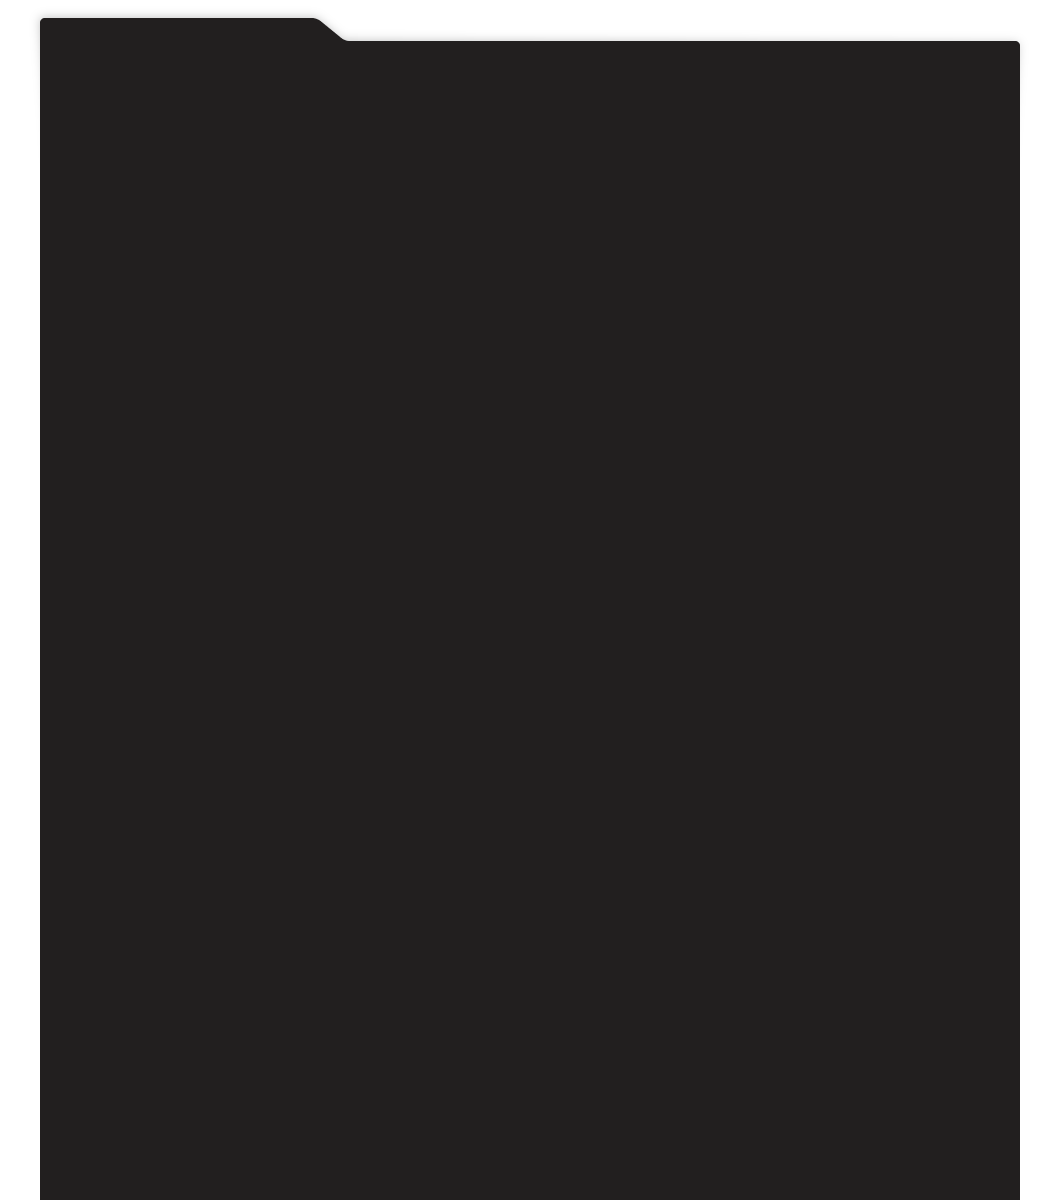
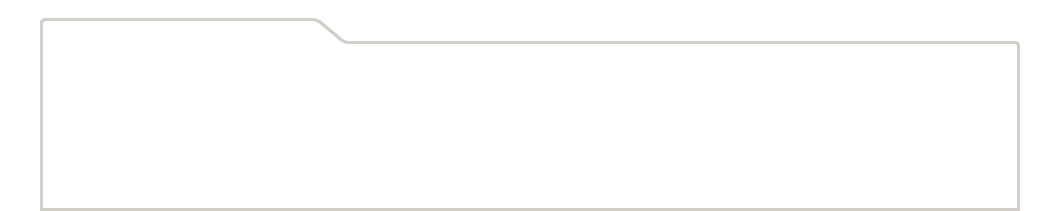
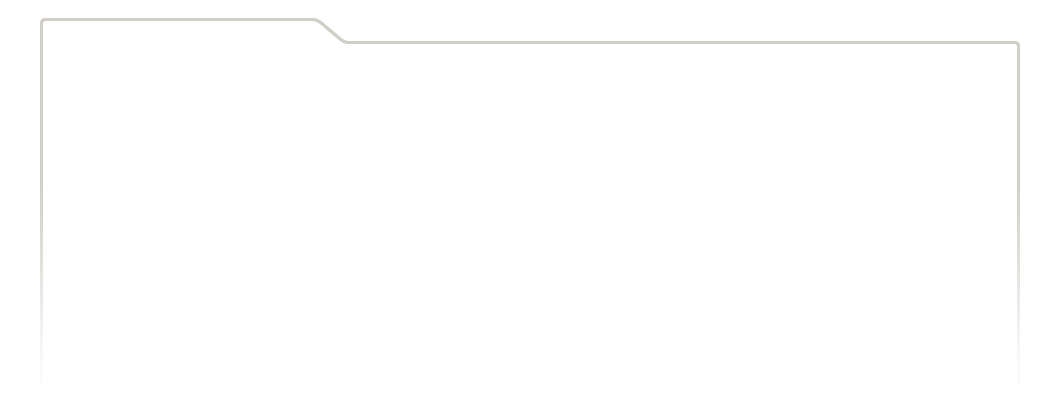
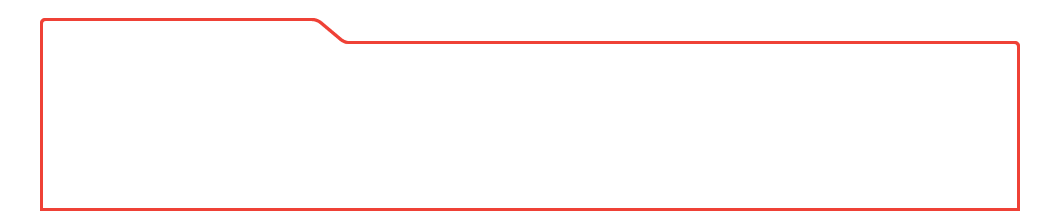
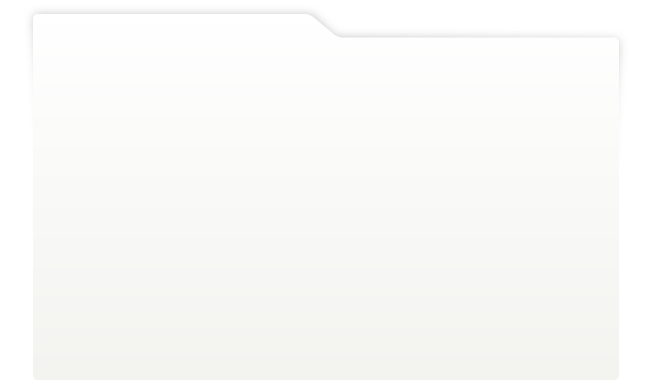
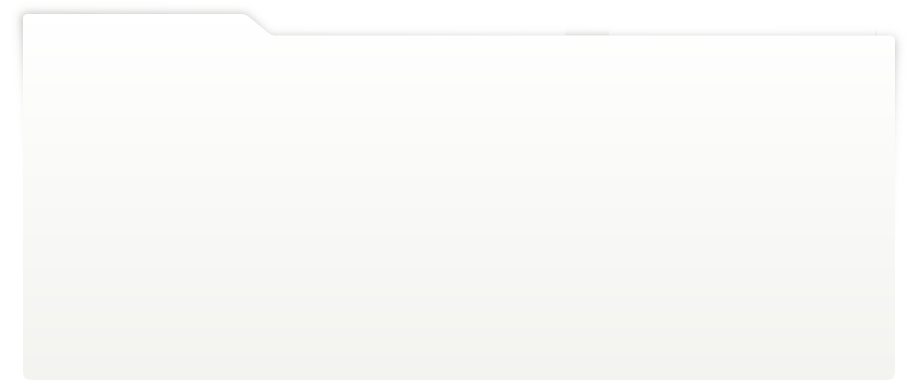
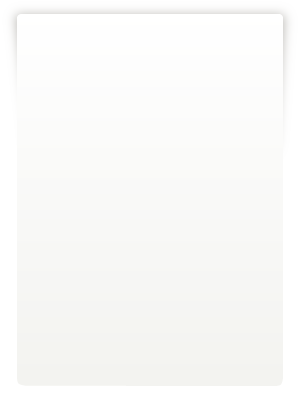
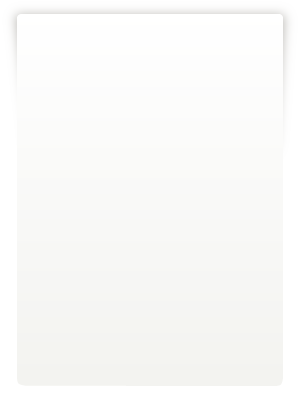
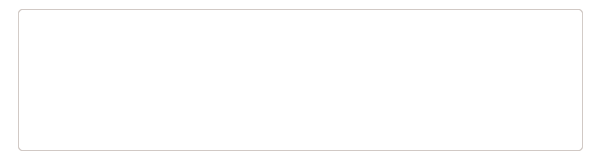
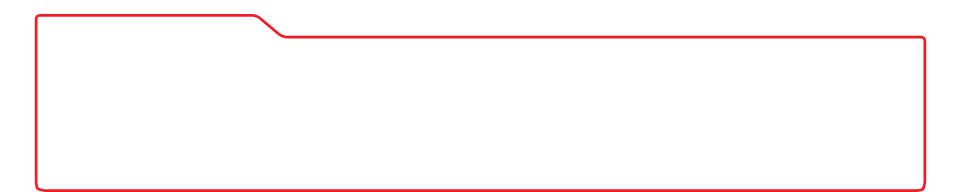
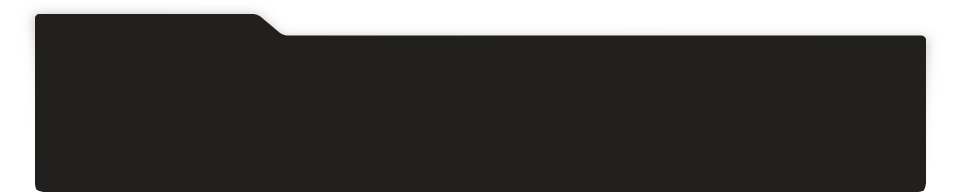
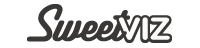
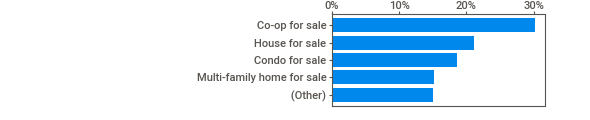
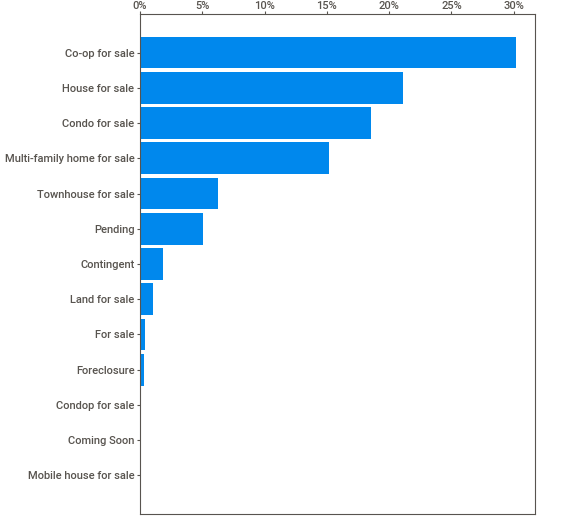
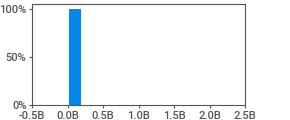
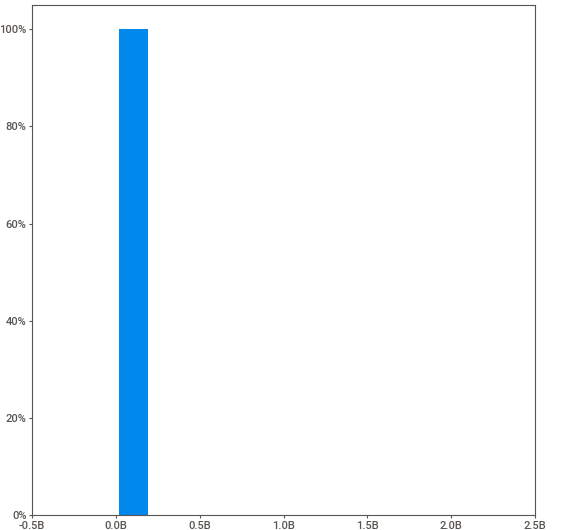
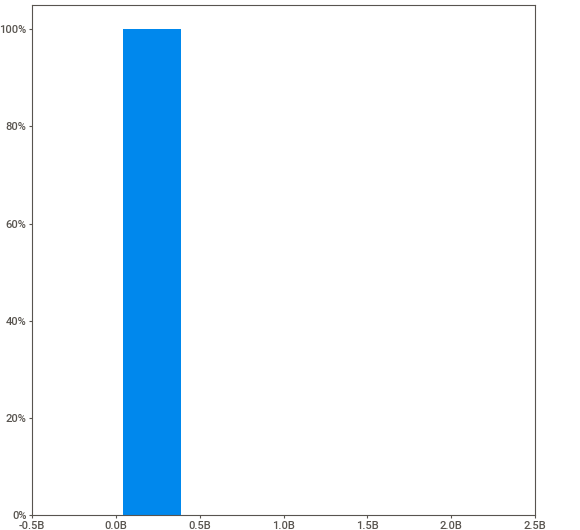
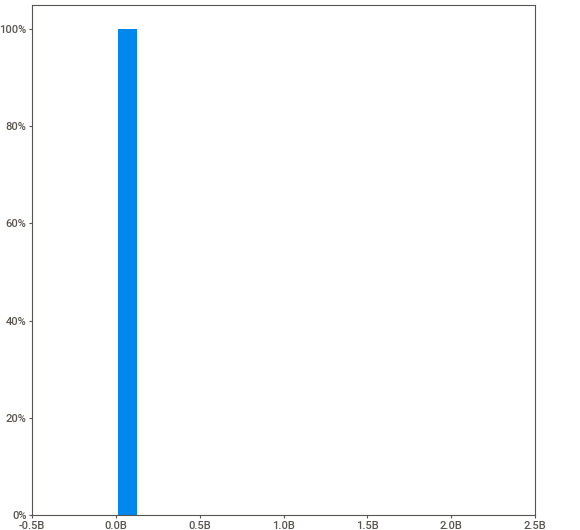
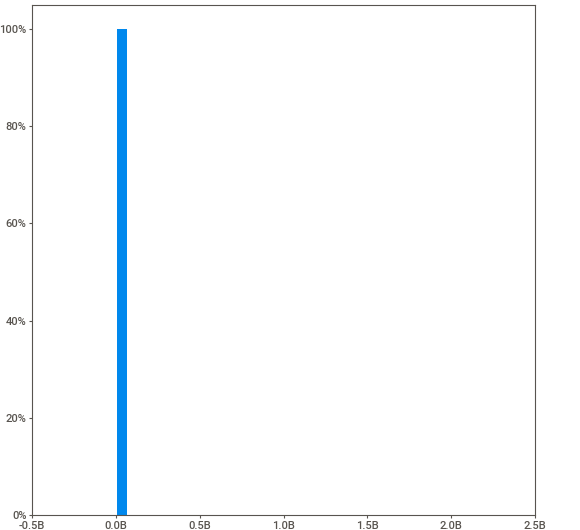
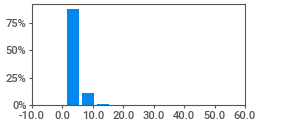
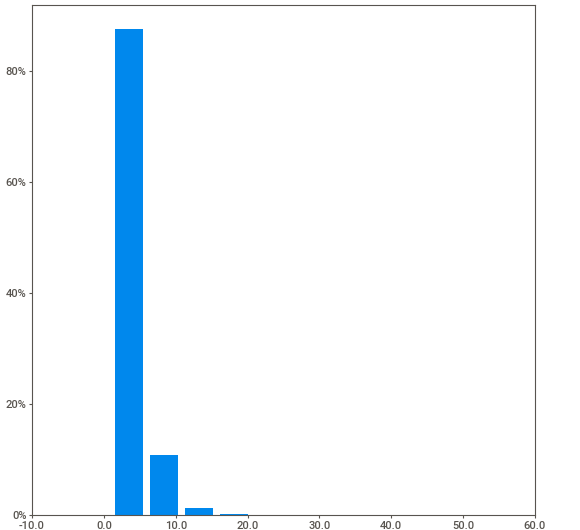
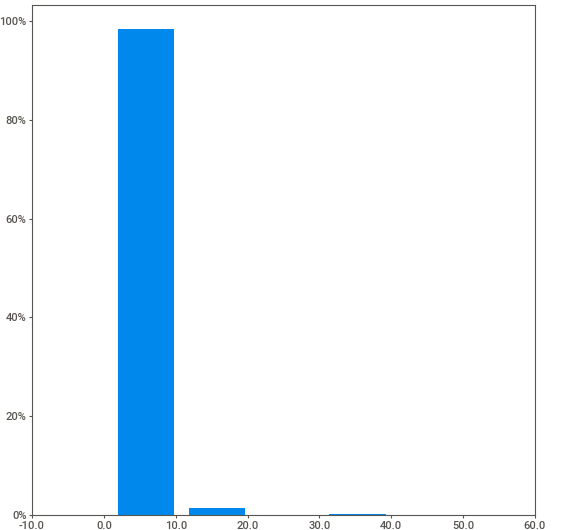
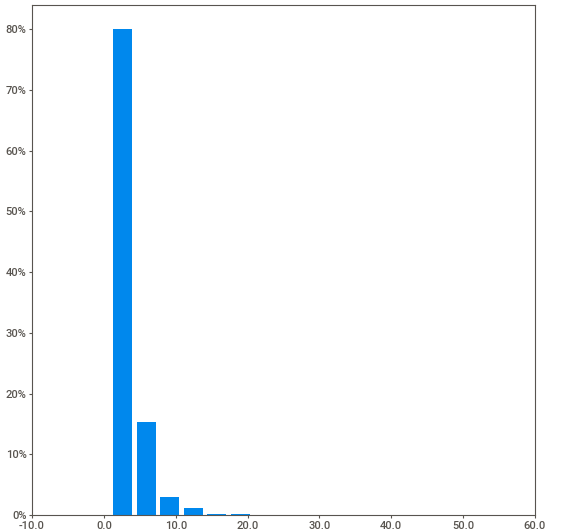
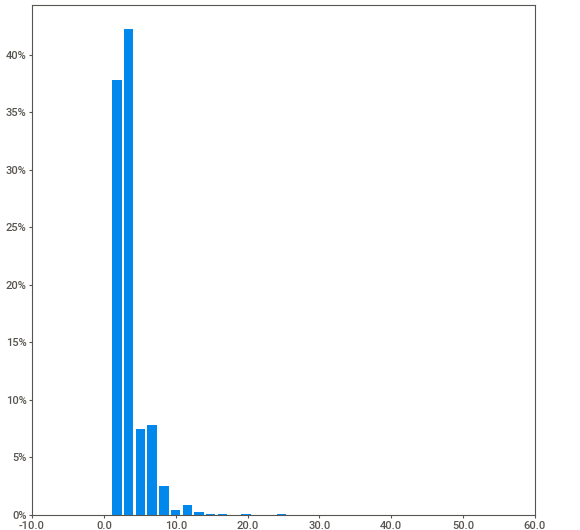
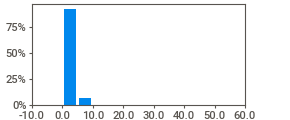
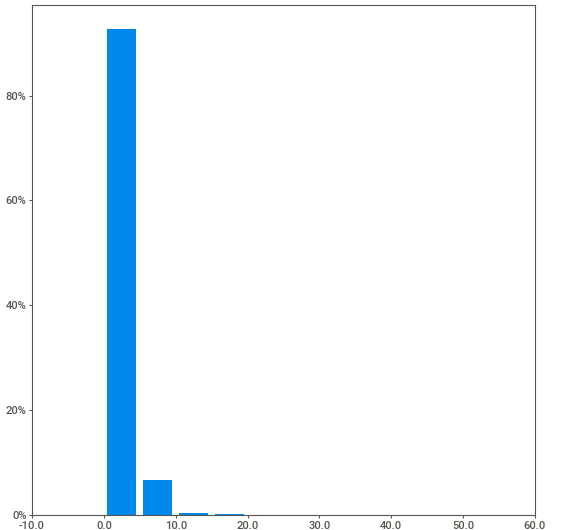
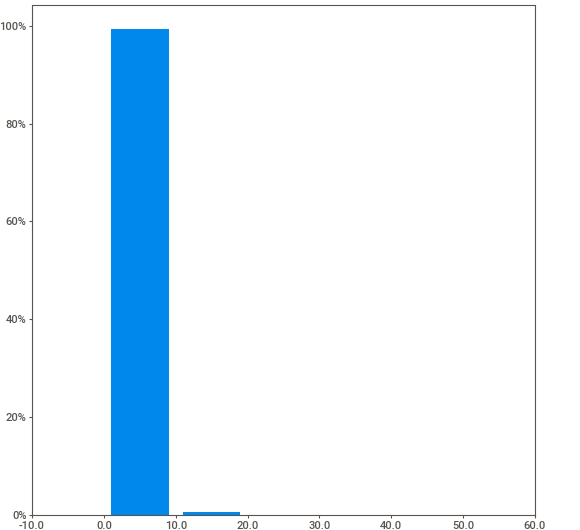
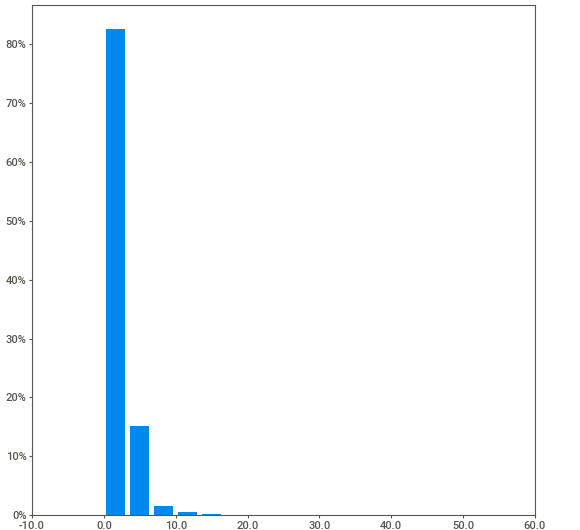
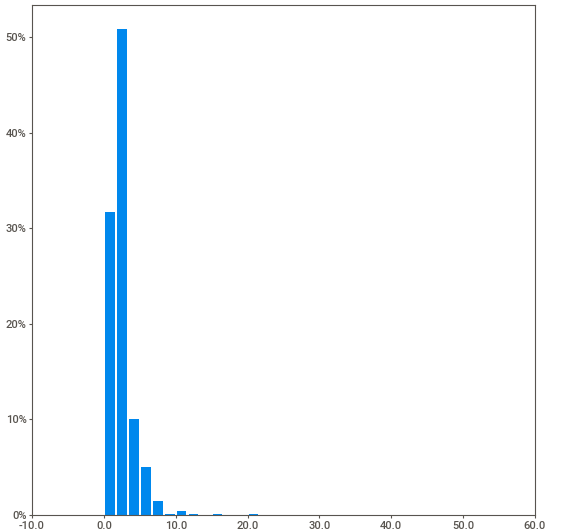
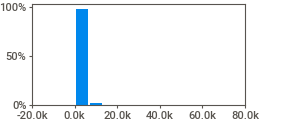
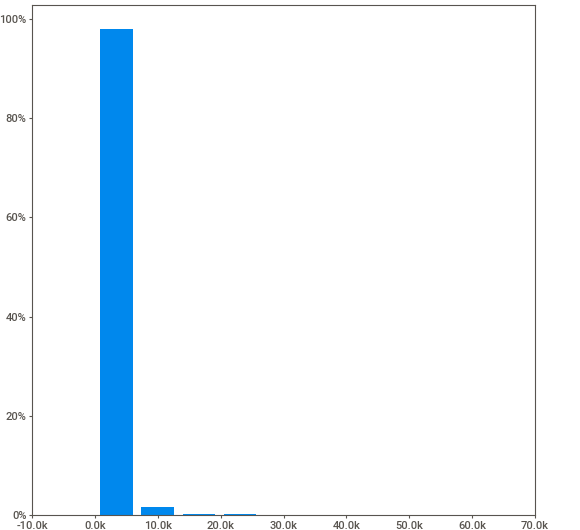
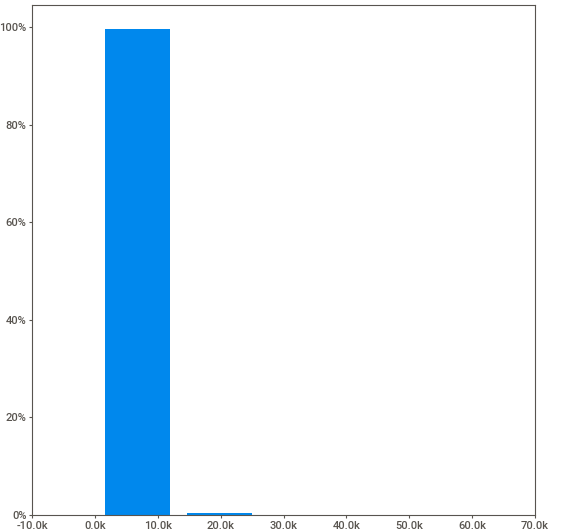
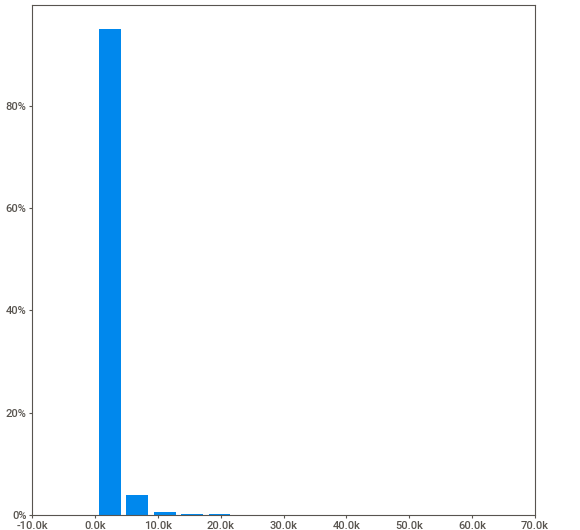
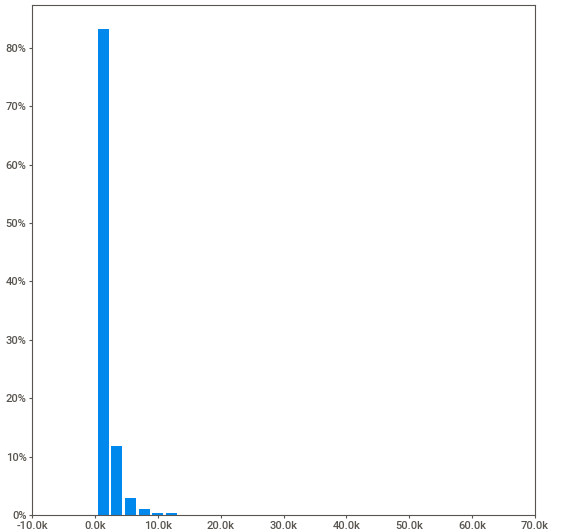
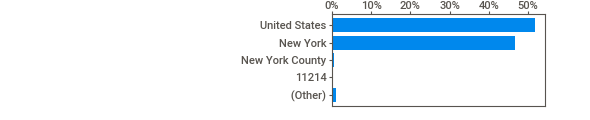
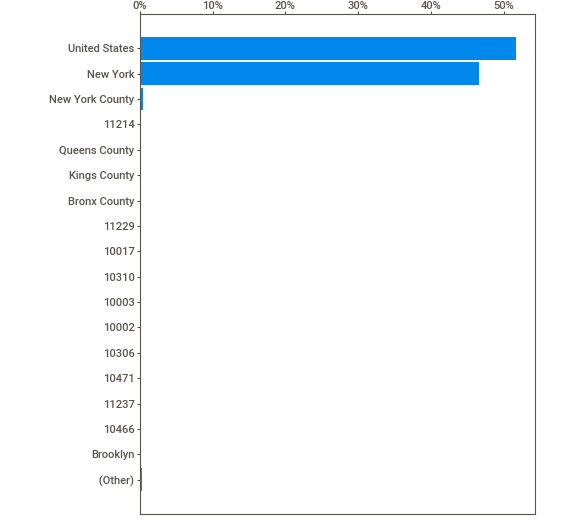
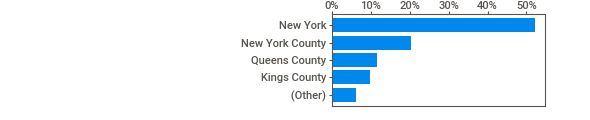
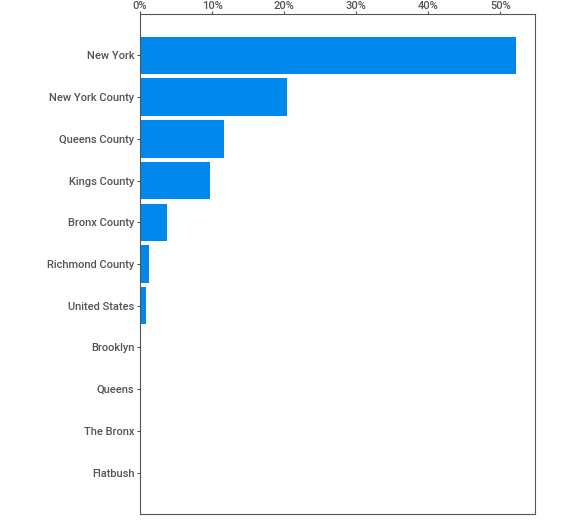
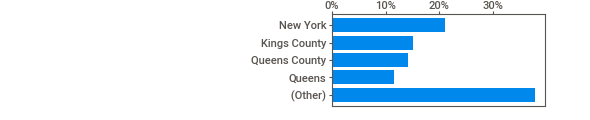
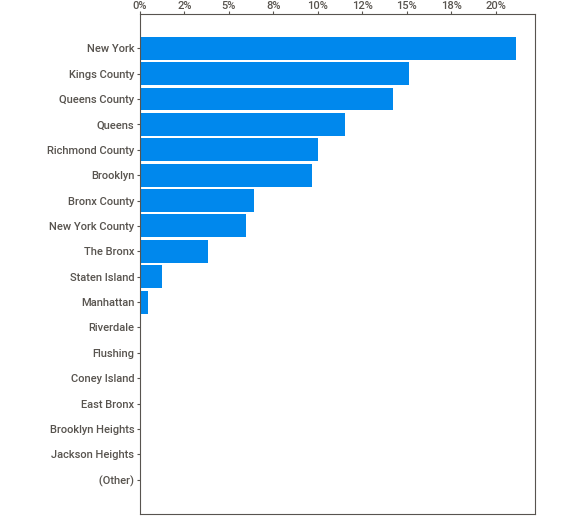
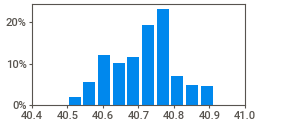
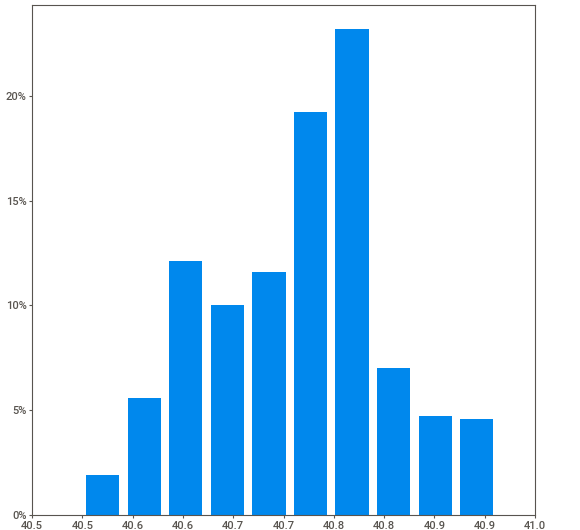
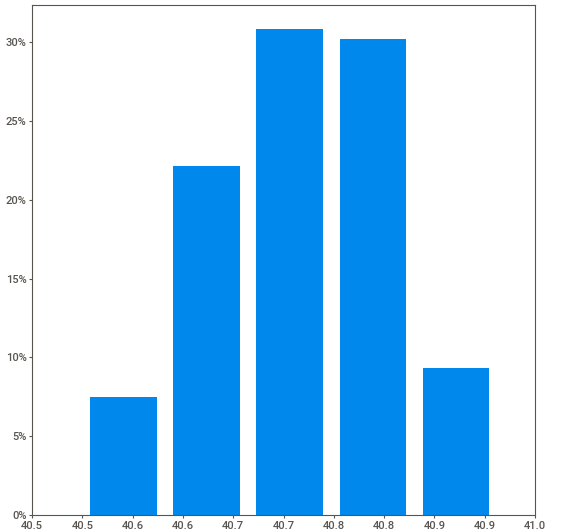
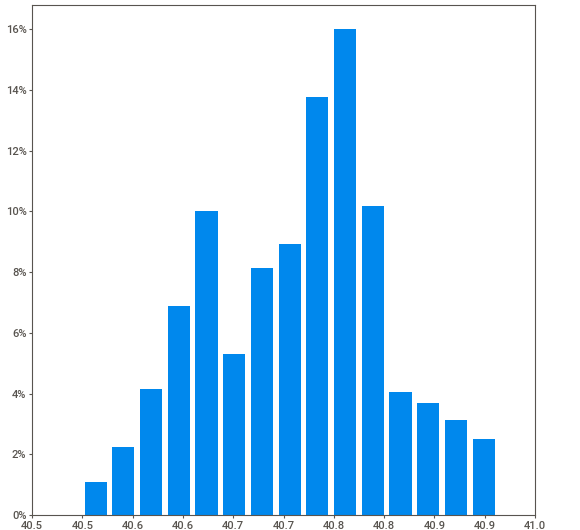
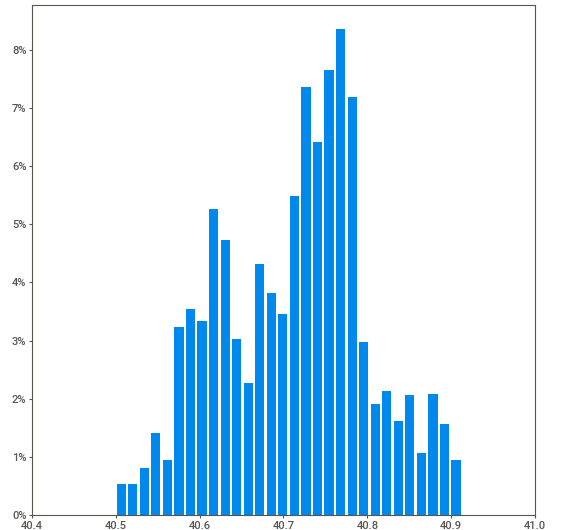
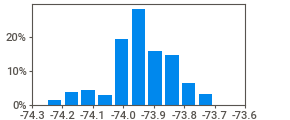
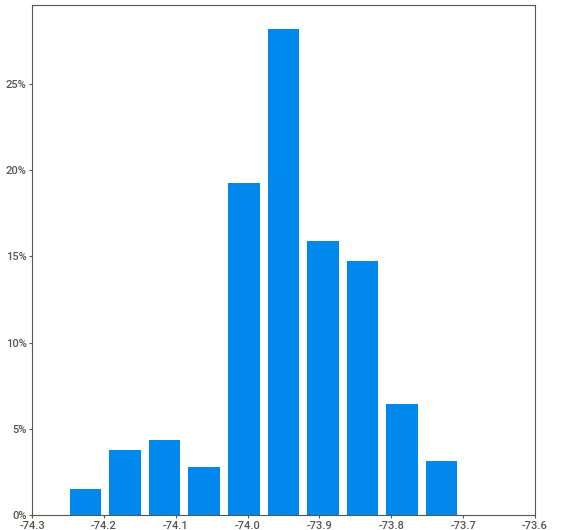
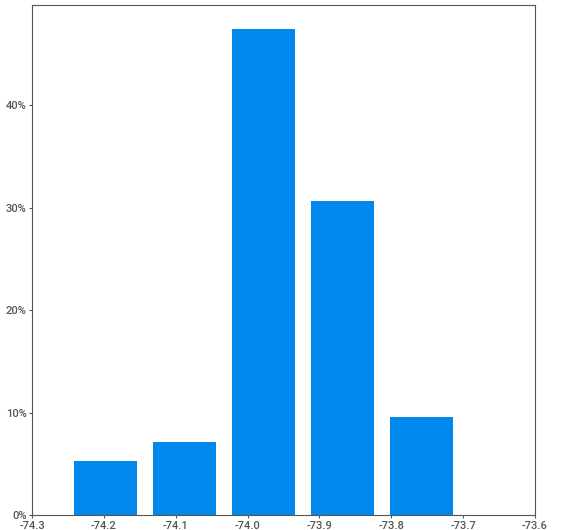
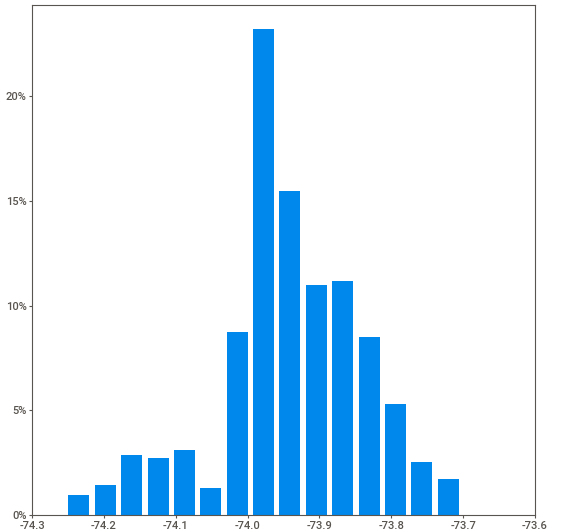
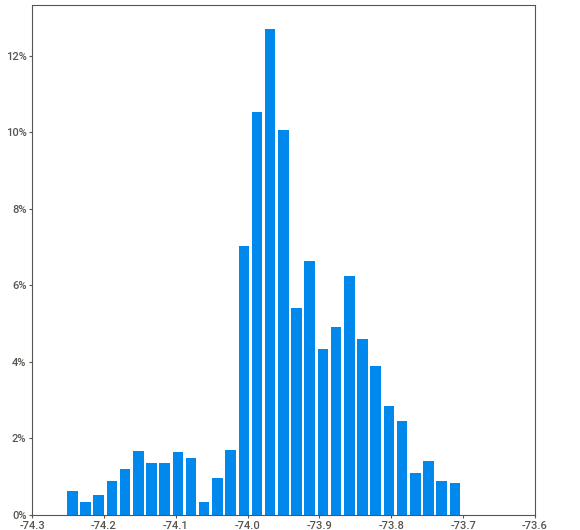
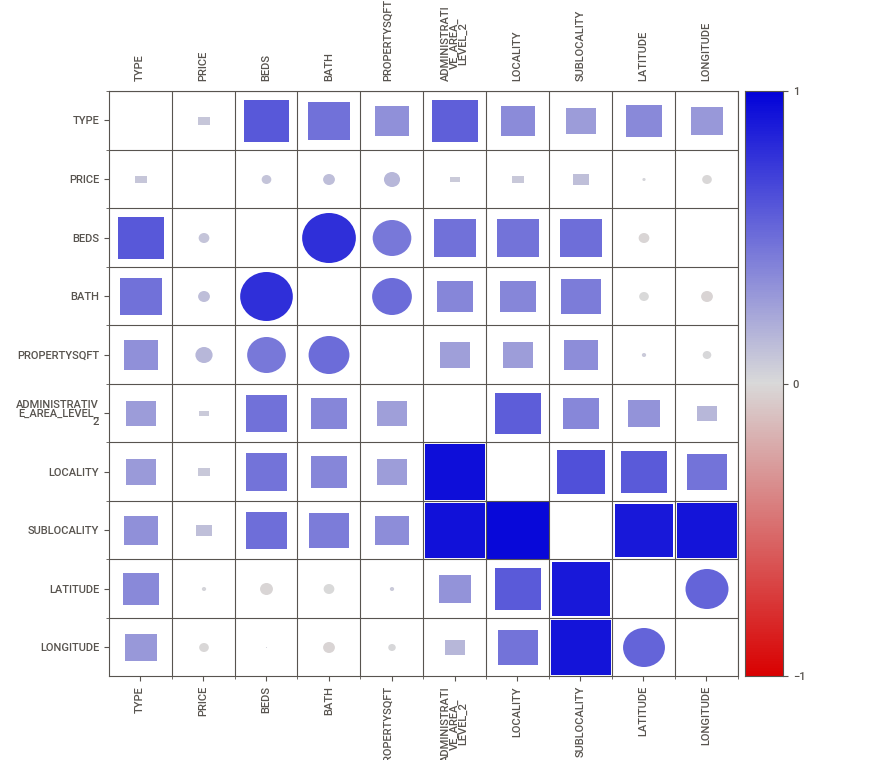
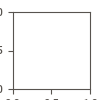

In [ ]:
my_report.show_notebook(w=None,
                h=None,
                scale=None,
                layout='widescreen',
                filepath=None)

In [ ]:
profile = ProfileReport(ny_house_data, title="Profiling Report")
profile.to_file("ny_house_report.html")

/usr/local/lib/python3.10/dist-packages/ydata_profiling/profile_report.py:354: UserWarning: Try running command: 'pip install --upgrade Pillow' to avoid ValueError
  warnings.warn(


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
# Check for null values
ny_house_data.isnull().sum()

BROKERTITLE                    0
TYPE                           0
PRICE                          0
BEDS                           0
BATH                           0
PROPERTYSQFT                   0
ADDRESS                        0
STATE                          0
MAIN_ADDRESS                   0
ADMINISTRATIVE_AREA_LEVEL_2    0
LOCALITY                       0
SUBLOCALITY                    0
STREET_NAME                    0
LONG_NAME                      0
FORMATTED_ADDRESS              0
LATITUDE                       0
LONGITUDE                      0
dtype: int64

In [ ]:
# Check for duplicates
ny_house_data.duplicated().sum()

214

In [ ]:
# Remove duplicates
ny_house_data.drop_duplicates(inplace=True)

In [ ]:
# Check the shape of our data
ny_house_data.shape

(4587, 17)

In [ ]:
# Selecting only numerical columns
numerical_columns = ny_house_data.drop(['LATITUDE', 'LONGITUDE'], axis=1).select_dtypes(include=[np.number])

In [ ]:
# Calculating the Interquartile Range (IQR) for each numerical column
Q1 = numerical_columns.quantile(0.25)
Q3 = numerical_columns.quantile(0.75)
IQR = Q3 - Q1

# Defining the lower and upper bounds for outlier detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Finding outliers by checking if values fall outside the bounds
outliers = (numerical_columns < lower_bound) | (numerical_columns > upper_bound)

# Printing outliers for each numerical column
for column in outliers.columns:
    print(f"Outliers in {column}:")
    print(ny_house_data[outliers[column]][column])
    print()

Outliers in PRICE:
1       195000000
4        55000000
7        16800000
46        4250000
54        3250000
          ...    
4733     21000000
4745     10500000
4765      3450000
4788      4750000
4795      2999999
Name: PRICE, Length: 528, dtype: int64

Outliers in BEDS:
7        8
27      12
29      10
32      10
36      11
        ..
4702     8
4721     9
4760     8
4786    12
4795    15
Name: BEDS, Length: 218, dtype: int64

Outliers in BATH:
1       10
7       16
32       8
99       8
119      8
        ..
4651     9
4691    17
4745    10
4792     7
4795     9
Name: BATH, Length: 108, dtype: int64

Outliers in PROPERTYSQFT:
1       17545.0
4       14175.0
5        4004.0
7       33000.0
27       5670.0
         ...   
4691    12733.0
4722     5427.0
4745     7040.0
4759     4100.0
4792     7854.0
Name: PROPERTYSQFT, Length: 374, dtype: float64



In [ ]:
# Calculating the number of outliers in each numerical column
num_outliers = outliers.sum()

# Computing the percentage of outliers in each numerical column
total_rows = ny_house_data.shape[0]
percentage_outliers = (num_outliers / total_rows) * 100

# Creating a DataFrame to store the results
outlier_stats = pd.DataFrame({
    'Num_Outliers': num_outliers,
    'Percentage_Outliers': percentage_outliers
})

# Displaying the outlier statistics
print("Outlier Statistics:")
outlier_stats

Outlier Statistics:


Num_Outliers  Percentage_Outliers
PRICE                  528            11.510791
BEDS                   218             4.752562
BATH                   108             2.354480
PROPERTYSQFT           374             8.153477

In [ ]:
# Selecting columns with outliers
outlier_columns = ['PRICE', 'BEDS', 'BATH', 'PROPERTYSQFT']

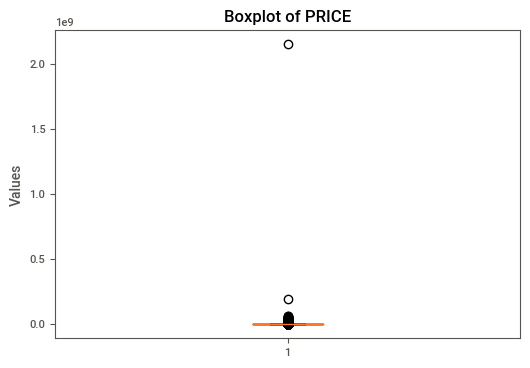

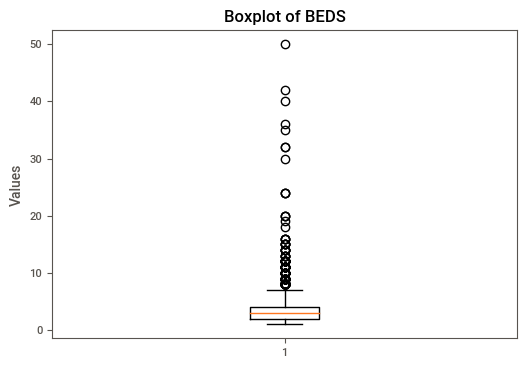

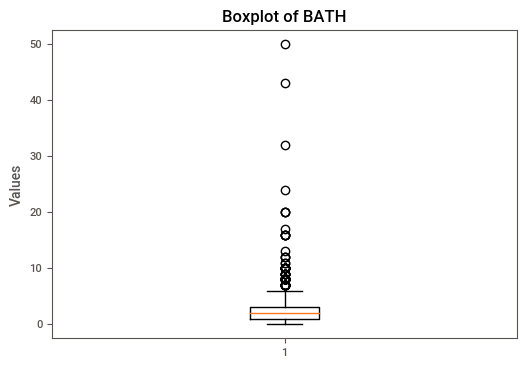

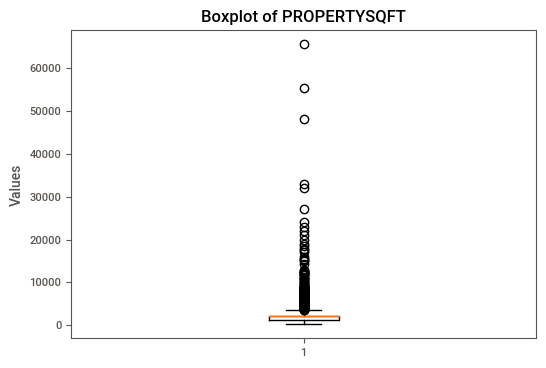

In [ ]:
# Plotting box plots for each column with outliers separately
for column in outlier_columns:
    plt.figure(figsize=(6, 4))
    plt.boxplot(ny_house_data[column])
    plt.title(f'Boxplot of {column}')
    plt.ylabel('Values')
    plt.show()

In [ ]:
# Calculate z-scores
z_scores = (ny_house_data['PRICE'] - ny_house_data['PRICE'].mean()) / ny_house_data['PRICE'].std()

# Threshold for identifying outliers
threshold = 3

# Identify outliers
outliers = ny_house_data[abs(z_scores) > threshold]
outliers

BROKERTITLE            TYPE       PRICE  BEDS  \
1                  Brokered by Serhant  Condo for sale   195000000     7   
304  Brokered by ANNE LOPA REAL ESTATE  House for sale  2147483647     7   

     BATH  PROPERTYSQFT                                            ADDRESS  \
1      10       17545.0  Central Park Tower Penthouse-217 W 57th New Yo...   
304     6       10000.0                                 6659-6675 Amboy Rd   

                  STATE                                       MAIN_ADDRESS  \
1    New York, NY 10019  Central Park Tower Penthouse-217 W 57th New Yo...   
304  New York, NY 10309               6659-6675 Amboy RdNew York, NY 10309   

    ADMINISTRATIVE_AREA_LEVEL_2  LOCALITY      SUBLOCALITY    STREET_NAME  \
1                 United States  New York  New York County       New York   
304               United States  New York  Richmond County  Staten Island   

            LONG_NAME                            FORMATTED_ADDRESS   LATITUDE  \
1    West 57th Street       217 W 57th St, New York, NY 10019, USA  40.766393   
304        Amboy Road  6659 Amboy Rd, Staten Island, NY 10309, USA  40.518484   

     LONGITUDE  
1   -73.980991  
304 -74.224418

Given that the outliers represent very luxurious houses, removing them may not be appropriate approach for now. Luxurious properties may indeed have significantly higher prices compared to the rest of the dataset, but they could still be valid and important data points.

In [ ]:
# Log-Transform the target variable to make it normal distribution
ny_house_data['PRICE_log'] = ny_house_data['PRICE'].apply(lambda x: np.log(x))

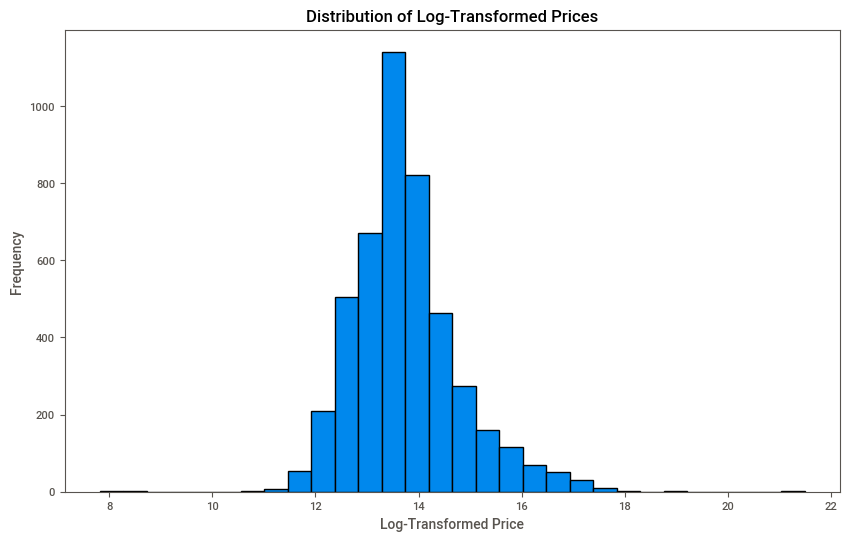

In [ ]:
# Plot histogram of log-transformed prices
plt.figure(figsize=(10, 6))
plt.hist(ny_house_data['PRICE_log'], bins=30, edgecolor='black')
plt.title('Distribution of Log-Transformed Prices')
plt.xlabel('Log-Transformed Price')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Check unique values of the TYPE column
ny_house_data['TYPE'].unique()

array(['Condo for sale', 'House for sale', 'Townhouse for sale',
       'Co-op for sale', 'Multi-family home for sale', 'For sale',
       'Contingent', 'Land for sale', 'Foreclosure', 'Pending',
       'Coming Soon', 'Mobile house for sale', 'Condop for sale'],
      dtype=object)

Explanation of the different types of properties commonly found in the New York real estate market:

- Condo for sale: Condominiums are individual units within a larger building or complex. Owners have title to their individual unit and share ownership of common areas with other unit owners.

- House for sale: This refers to standalone residential properties, typically detached from other structures, such as single-family homes or detached houses.

- Townhouse for sale: Townhouses, also known as row houses or terraced houses, are narrow, multi-story homes that share walls with adjacent properties. They are often arranged in rows and have a similar architectural style.

- Co-op for sale: Cooperative apartments, or co-ops, are multi-unit buildings where residents own shares in the corporation that owns the entire property. Instead of owning their individual unit, co-op owners hold shares that entitle them to occupy a specific unit.

- Multi-family home for sale: These are properties with multiple separate living units, such as duplexes, triplexes, or apartment buildings. Each unit typically has its own entrance and amenities.

- For sale: This category may encompass various types of properties that are listed for sale but may not fit into the other specific categories provided.

- Contingent: Properties listed as contingent are under contract with a buyer, but certain conditions must be met before the sale can be finalized. For example, the sale might be contingent on the buyer securing financing or completing a home inspection.

- Land for sale: Refers to vacant land or lots that are available for purchase. Buyers may purchase land for development, investment, or other purposes.

- Foreclosure: These properties are owned by a bank or lender as a result of the previous owner's failure to make mortgage payments. They are typically sold at auction or through a real estate agent.

- Pending: Properties that are pending are under contract and in the process of closing. The sale has not yet been completed, but all necessary steps are being taken to finalize the transaction.

- Coming Soon: Indicates that the property will be listed for sale in the near future but is not yet officially on the market.

- Mobile house for sale: Refers to mobile or manufactured homes, which are prefabricated dwellings that can be transported and placed on a permanent or semi-permanent foundation.

- Condop for sale: A condop is a hybrid between a condominium and a cooperative apartment. It typically operates as a co-op but has some features of a condo, such as individual unit ownership and more flexible subletting rules.

In [ ]:
# Check unique values of the ADMINISTRATIVE_AREA_LEVEL_2 column
ny_house_data['ADMINISTRATIVE_AREA_LEVEL_2'].unique()

array(['New York County', 'United States', 'New York', 'Bronx County',
       '11214', '10301', '10309', '10303', '11234', '11414', '10310',
       '10003', '11417', '10304', 'Kings County', '10463',
       'Queens County', '10017', '10306', '10471', '11229', '10312',
       '11412', '10465', 'Brooklyn', '10002', '10466', '11237', '11218'],
      dtype=object)

NYC contains 5 counties: **New York County, Bronx County, Kings County, Queens County, and Richmond County**. Each county makes up one of the boroughs; **Manhattan, the Bronx, Brooklyn, Queens, and Staten Island** respectively. We will try to fix the columns 'LOCALITY' and 'SUBLOCALITY' according to this hierarchy in order to have columns ready to encode and give the to the regression algorithms.

In [ ]:
# Check unique values of the LOCALITY column
ny_house_data['LOCALITY'].unique()

array(['New York', 'New York County', 'The Bronx', 'Kings County',
       'Bronx County', 'Queens County', 'Richmond County',
       'United States', 'Brooklyn', 'Queens', 'Flatbush'], dtype=object)

In [ ]:
# Replace 'United States' in LOCALITY column with values from STREET_NAME column
ny_house_data.loc[ny_house_data['LOCALITY'] == 'United States', 'LOCALITY'] = ny_house_data.loc[ny_house_data['LOCALITY'] == 'United States', 'STREET_NAME']

# Check unique values after correction
ny_house_data['LOCALITY'].unique()

array(['New York', 'New York County', 'The Bronx', 'Kings County',
       'Bronx County', 'Queens County', 'Richmond County', 'Brooklyn',
       'Queens', 'Flatbush'], dtype=object)

In [ ]:
# Define the mapping for locality correction
locality_mapping = {
    'New York': 'New York County',
    'The Bronx': 'Bronx County',
    'Queens': 'Queens County',
    'Brooklyn': 'Kings County',
    'Flatbush': 'Kings County'
}

# Apply the mapping to the LOCALITY column
ny_house_data['LOCALITY'] = ny_house_data['LOCALITY'].map(locality_mapping).fillna(ny_house_data['LOCALITY'])

# Check unique values after correction
ny_house_data['LOCALITY'].unique()

array(['New York County', 'Bronx County', 'Kings County', 'Queens County',
       'Richmond County'], dtype=object)

Now LOCALITY contains the 5 counties of the first level of the hierarchy of NY counties:
'New York County', 'Bronx County', 'Kings County', 'Queens County',    'Richmond County'

In [ ]:
ny_house_data['SUBLOCALITY'].unique()

array(['Manhattan', 'New York County', 'Richmond County', 'Kings County',
       'New York', 'East Bronx', 'Brooklyn', 'The Bronx', 'Queens',
       'Staten Island', 'Queens County', 'Bronx County', 'Coney Island',
       'Brooklyn Heights', 'Jackson Heights', 'Riverdale', 'Rego Park',
       'Fort Hamilton', 'Flushing', 'Dumbo', 'Snyder Avenue'],
      dtype=object)

Sublocality contains information about the boroughs of New York, but we find it more extensively informative in STATE column, where we will take the first part and replace it in SUBLOCALITY.

In [ ]:
# Check the unique values of STATE column
ny_house_data['STATE'].unique()

array(['New York, NY 10022', 'New York, NY 10019',
       'Staten Island, NY 10312', 'Manhattan, NY 10022',
       'New York, NY 10065', 'Brooklyn, NY 11238', 'New York, NY 10027',
       'Staten Island, NY 10304', 'Bronx, NY 10473', 'Brooklyn, NY 11230',
       'Bronx, NY 10451', 'Staten Island, NY 10303',
       'Jackson Heights, NY 11372', 'Elmhurst, NY 11373',
       'New York, NY 10014', 'Woodside, NY 11377', 'Brooklyn, NY 11209',
       'Bronx, NY 10471', 'Rego Park, NY 11374',
       'Staten Island, NY 10301', 'Forest Hills, NY 11375',
       'Bronx, NY 10465', 'Staten Island, NY 10307',
       'Briarwood, NY 11435', 'Queens, NY 11372', 'Brooklyn, NY 11214',
       'Staten Island, NY 10314', 'Brooklyn, NY 11207',
       'Brooklyn, NY 11219', 'Flushing, NY 11355', 'Brooklyn, NY 11249',
       'Bronx, NY 10453', 'Brooklyn, NY 11204', 'Woodhaven, NY 11421',
       'Jamaica, NY 11435', 'Manhattan, NY 10012', 'Flushing, NY 11358',
       'Richmond Hill South, NY 11419', 'New York, NY

In [ ]:
# Split the 'STATE' column to extract the first part
ny_house_data['SUBLOCALITY'] = ny_house_data['STATE'].apply(lambda x: x.split(',')[0].strip())

# Check unique values after correction
ny_house_data['SUBLOCALITY'].unique()

array(['New York', 'Staten Island', 'Manhattan', 'Brooklyn', 'Bronx',
       'Jackson Heights', 'Elmhurst', 'Woodside', 'Rego Park',
       'Forest Hills', 'Briarwood', 'Queens', 'Flushing', 'Woodhaven',
       'Jamaica', 'Richmond Hill South', 'Whitestone', 'Ridgewood',
       'Rosedale', 'Ozone Park', 'Springfield Gardens', 'Far Rockaway',
       'Bellerose', 'Bayside', 'Astoria', 'Floral Park', 'Fresh Meadows',
       'Howard Beach', 'Cambria Heights', 'Rockaway Park',
       'East Elmhurst', 'Little Neck', 'Long Island City', 'Ny', 'Corona',
       'Kew Gardens', 'Brownville', 'Brooklyn Heights', 'Maspeth',
       'Queens Village', 'Richmond Hill', 'Middle Village',
       'Saint Albans', 'Kensington', 'South Ozone Park', 'Canarsie',
       'College Point', 'Bedford Stuyvesant', 'New York City', 'Hollis',
       'Malba', 'Glen Oaks', 'Douglaston', 'Sunnyside', 'Arverne',
       'Glendale', 'New Hyde Park', 'Crown Heights', 'Old Mill Basin',
       'Beechhurst', 'Roosevelt Island', 

In [ ]:
# Replace variations of 'New York' with 'New York'
ny_house_data['SUBLOCALITY'] = ny_house_data['SUBLOCALITY'].replace(['Ny', 'New York City', 'Nyc'], 'New York')

# Replace variations of 'Bronx' with 'Bronx'
ny_house_data['SUBLOCALITY'] = ny_house_data['SUBLOCALITY'].replace(['Bronx Ny'], 'Bronx')

# Check unique values after replacement
ny_house_data['SUBLOCALITY'].unique()

array(['New York', 'Staten Island', 'Manhattan', 'Brooklyn', 'Bronx',
       'Jackson Heights', 'Elmhurst', 'Woodside', 'Rego Park',
       'Forest Hills', 'Briarwood', 'Queens', 'Flushing', 'Woodhaven',
       'Jamaica', 'Richmond Hill South', 'Whitestone', 'Ridgewood',
       'Rosedale', 'Ozone Park', 'Springfield Gardens', 'Far Rockaway',
       'Bellerose', 'Bayside', 'Astoria', 'Floral Park', 'Fresh Meadows',
       'Howard Beach', 'Cambria Heights', 'Rockaway Park',
       'East Elmhurst', 'Little Neck', 'Long Island City', 'Corona',
       'Kew Gardens', 'Brownville', 'Brooklyn Heights', 'Maspeth',
       'Queens Village', 'Richmond Hill', 'Middle Village',
       'Saint Albans', 'Kensington', 'South Ozone Park', 'Canarsie',
       'College Point', 'Bedford Stuyvesant', 'Hollis', 'Malba',
       'Glen Oaks', 'Douglaston', 'Sunnyside', 'Arverne', 'Glendale',
       'New Hyde Park', 'Crown Heights', 'Old Mill Basin', 'Beechhurst',
       'Roosevelt Island', 'Kew Gardens Hills', 'S

And by this we kept the information about the borough and their relevant neighborhood of each property. However, in our models we will use only SUBLOCALITY as independent variable.

In [ ]:
# Make a copy of ny_house_data and drop unnecessary columns
df_model = ny_house_data.drop(columns=['BROKERTITLE', 'ADDRESS', 'STATE', 'MAIN_ADDRESS', 'ADMINISTRATIVE_AREA_LEVEL_2', 'STREET_NAME', 'LOCALITY', 'LONG_NAME', 'LATITUDE',	'LONGITUDE', 'FORMATTED_ADDRESS', 'PRICE']).copy()

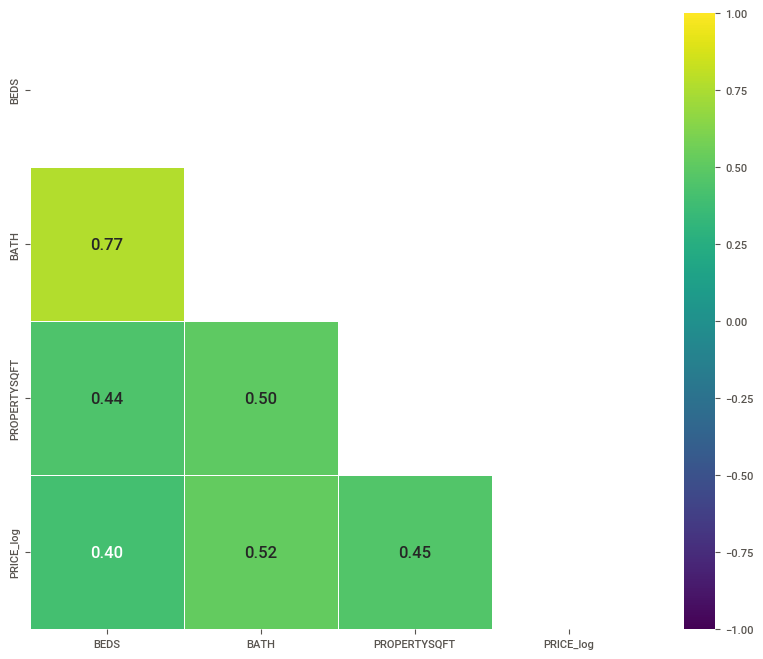

In [ ]:
# Calculate the correlation matrix
correlation_matrix = df_model.corr()

# Create a mask using numpy's triu function
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Create a masked heatmap
plt.figure(figsize = (10,8))
plt.rcParams.update({'font.size': 12})
sns.heatmap(correlation_matrix, cmap = 'viridis', vmin = -1, vmax = 1, center = 0, annot=True, fmt=".2f", square=True, linewidths=.5, mask = mask)
plt.show()

In [ ]:
df_model.head()

TYPE  BEDS  BATH  PROPERTYSQFT    SUBLOCALITY  PRICE_log
0      Condo for sale     2     2        1400.0       New York  12.660328
1      Condo for sale     7    10       17545.0       New York  19.088510
2      House for sale     4     2        2015.0  Staten Island  12.468437
3      Condo for sale     3     1         445.0      Manhattan  11.141862
4  Townhouse for sale     7     2       14175.0       New York  17.822844

## Preprocessing steps

In [ ]:
# Define columns for different data types
categorical_cols = ['TYPE', 'SUBLOCALITY']
numerical_cols = ['BEDS', 'BATH', 'PROPERTYSQFT']

# Create preprocessing transformers
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Combine transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_cols),
        ('num', numerical_transformer, numerical_cols)
    ])

In [ ]:
# Save the preprocessor using pickle
with open('preprocessor.pkl', 'wb') as pipeline_file:
    pickle.dump(preprocessor, pipeline_file)

## Modeling

In [ ]:
# Assigning features (X) and target variable (y) for machine learning model
X = df_model.drop(columns = 'PRICE_log')
y = df_model['PRICE_log']

In [ ]:
# # Splitting the dataset into training and testing sets for both features (X) and target variable (y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
# Define models
models = {
    'XGBRegressor': XGBRegressor(),
    'RandomForestRegressor': RandomForestRegressor(),
    'GradientBoostingRegressor': GradientBoostingRegressor()
}

# Create pipeline for each model
pipelines = {}
for name, model in models.items():
    pipelines[name] = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])

In [ ]:
# Training and evaluating models
for name, pipeline in pipelines.items():
    # Fit the pipeline
    pipeline.fit(X_train, y_train)

    # Make predictions
    predictions = pipeline.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)

    # Print evaluation metrics
    print(f'Model: {name}')
    print(f'Mean Squared Error: {mse}')
    print(f'Mean Absolute Error: {mae}')
    print(f'R^2 Score: {r2}')
    print('-----------------------------')

Model: XGBRegressor
Mean Squared Error: 0.24005699152936189
Mean Absolute Error: 0.3380736631641616
R^2 Score: 0.7675893293210949
-----------------------------
Model: RandomForestRegressor
Mean Squared Error: 0.2594554675175907
Mean Absolute Error: 0.34545825163305444
R^2 Score: 0.7488087356551885
-----------------------------
Model: GradientBoostingRegressor
Mean Squared Error: 0.25741968901797113
Mean Absolute Error: 0.347932553887664
R^2 Score: 0.7507796703213109
-----------------------------


## Hyperparameter Tuning

In [ ]:
# Hyperparameter grids
param_grids = {
    'XGBRegressor': {
        'regressor__n_estimators': [100, 300, 500],
        'regressor__max_depth': [3, 5, 7],
        'regressor__learning_rate': [0.01, 0.05, 0.1]
    },
    'RandomForestRegressor': {
        'regressor__n_estimators': [100, 300, 500],
        'regressor__max_depth': [None, 10, 20],
        'regressor__min_samples_split': [2, 5, 10]
    },
    'GradientBoostingRegressor': {
        'regressor__n_estimators': [100, 300, 500],
        'regressor__max_depth': [3, 5, 7],
        'regressor__learning_rate': [0.01, 0.05, 0.1]
    }
}

# Create pipeline for each model
pipelines = {}
for name, model in models.items():
    pipelines[name] = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])

# Perform hyperparameter tuning and training
for name, pipeline in pipelines.items():
    # Grid search with cross-validation
    grid_search = GridSearchCV(pipeline, param_grid=param_grids[name], cv=5)

    # Fit the pipeline
    grid_search.fit(X_train, y_train)

    # Make predictions
    predictions = grid_search.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)

    # Print evaluation metrics and best parameters
    print(f'Model: {name}')
    print(f'Best Parameters: {grid_search.best_params_}')
    print(f'Mean Squared Error: {mse}')
    print(f'Mean Absolute Error: {mae}')
    print(f'R^2 Score: {r2}')
    print('-----------------------------')

Model: XGBRegressor
Best Parameters: {'regressor__learning_rate': 0.05, 'regressor__max_depth': 5, 'regressor__n_estimators': 500}
Mean Squared Error: 0.232527734058263
Mean Absolute Error: 0.3307474677842784
R^2 Score: 0.774878764081666
-----------------------------
Model: RandomForestRegressor
Best Parameters: {'regressor__max_depth': None, 'regressor__min_samples_split': 10, 'regressor__n_estimators': 300}
Mean Squared Error: 0.24041117168938814
Mean Absolute Error: 0.33311661788898844
R^2 Score: 0.7672464305452316
-----------------------------
Model: GradientBoostingRegressor
Best Parameters: {'regressor__learning_rate': 0.05, 'regressor__max_depth': 5, 'regressor__n_estimators': 300}
Mean Squared Error: 0.23735111977633966
Mean Absolute Error: 0.33273656767527526
R^2 Score: 0.7702090133589751
-----------------------------


Based on our metrics, it appears that the XGBRegressor model has slightly better performance compared to the GradientBoostingRegressor and RandomForestRegressor models.

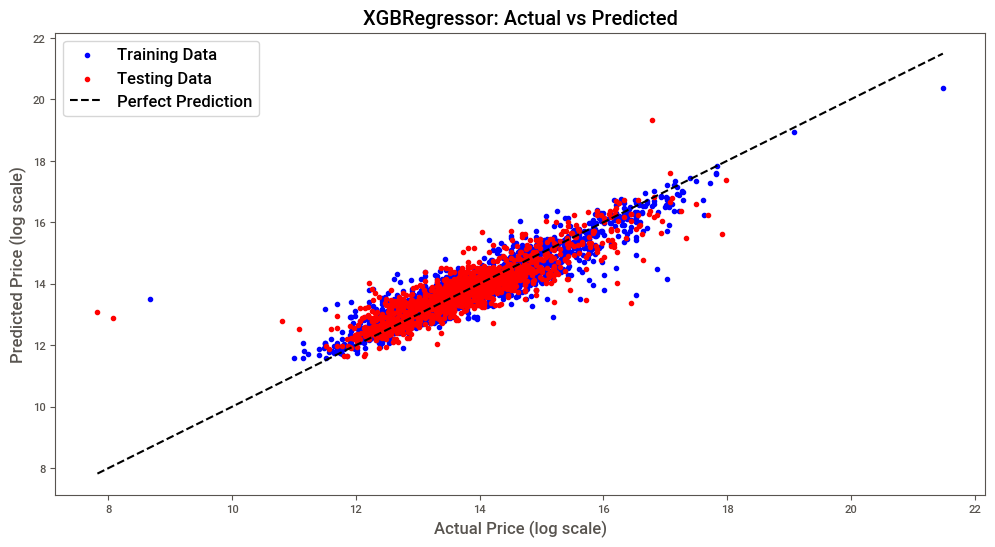

In [ ]:
# Get the best XGBRegressor model from the grid search
best_xgb_model = grid_search.best_estimator_

# Predictions on training data
train_predictions = best_xgb_model.predict(X_train)

# Predictions on testing data
test_predictions = best_xgb_model.predict(X_test)

# Plotting the training data
plt.figure(figsize=(12, 6))
plt.scatter(y_train, train_predictions, color='blue', label='Training Data')

# Plotting the testing data
plt.scatter(y_test, test_predictions, color='red', label='Testing Data')

# Plotting the line y = x for reference
plt.plot([min(y_train.min(), y_test.min()), max(y_train.max(), y_test.max())],
         [min(y_train.min(), y_test.min()), max(y_train.max(), y_test.max())],
         color='black', linestyle='--', label='Perfect Prediction')

plt.title('XGBRegressor: Actual vs Predicted')
plt.xlabel('Actual Price (log scale)')
plt.ylabel('Predicted Price (log scale)')
plt.legend()
plt.show()

In [ ]:
# Save the trained model using pickle
with open('xgb_model.pkl', 'wb') as model_file:
    pickle.dump(best_xgb_model, model_file)

## Example of Deployment

In [ ]:
import pickle
import pandas as pd
import numpy as np

In [ ]:
# Load the trained XGBRegressor model
with open('xgb_model.pkl', 'rb') as model_file:
    xgb_model = pickle.load(model_file)

In [ ]:
# Prepare input data
input_data = pd.DataFrame({
    'TYPE': ['TYPE_Co-op for sale'],  # Example input for 'TYPE'
    'SUBLOCALITY': ['SUBLOCALITY_Arverne'],  # Example input for 'SUBLOCALITY'
    'BEDS': [5],  # Example input for 'BEDS'
    'BATH': [3],  # Example input for 'BATH'
    'PROPERTYSQFT': [5000]  # Example input for 'PROPERTYSQFT'
})

# Make predictions
predictions = xgb_model.predict(input_data)

# Un-log the predicted price and round it
predicted_price = np.round(np.exp(predictions), 2)

# Output the un-logged and rounded price
print("Predicted price:", predicted_price)

Predicted price: [2556365.47]


## Deployment

In [ ]:
from flask import Flask, render_template, request
from flask import jsonify
import pickle
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore", category=UserWarning)


app = Flask(__name__)

# Set the static folder path
app.config['STATIC_FOLDER'] = 'static'

with open('xgb_model.pkl', 'rb') as model_file:
    xgb_model = pickle.load(model_file)

# Define the prediction route
@app.route('/', methods=['GET'])
def index():
    return render_template('index.html')

# Define the prediction route
@app.route('/predict', methods=['POST'])
def predict():
    # Get the JSON data from the request
    data = request.get_json()

    # Create a DataFrame from the JSON data
    df = pd.DataFrame({
        'TYPE': [data.get('property_type')],
        'SUBLOCALITY': [data.get('neighborhood')],
        'BEDS': [int(data.get('bedrooms'))],
        'BATH': [int(data.get('baths'))],
        'PROPERTYSQFT': [int(data.get('property_sqft'))]
    })

    # Make prediction
    predicted_log_price = xgb_model.predict(df)

    # Un-log the predicted price
    predicted_price = np.round(np.exp(predicted_log_price)[0], 2)

    # Return the predicted price as JSON response
    return jsonify({"prediction_text": "<b>House price should be ${:.2f}</b>".format(predicted_price)})

if __name__ == '__main__':
    app.run(port=5000, debug=False)

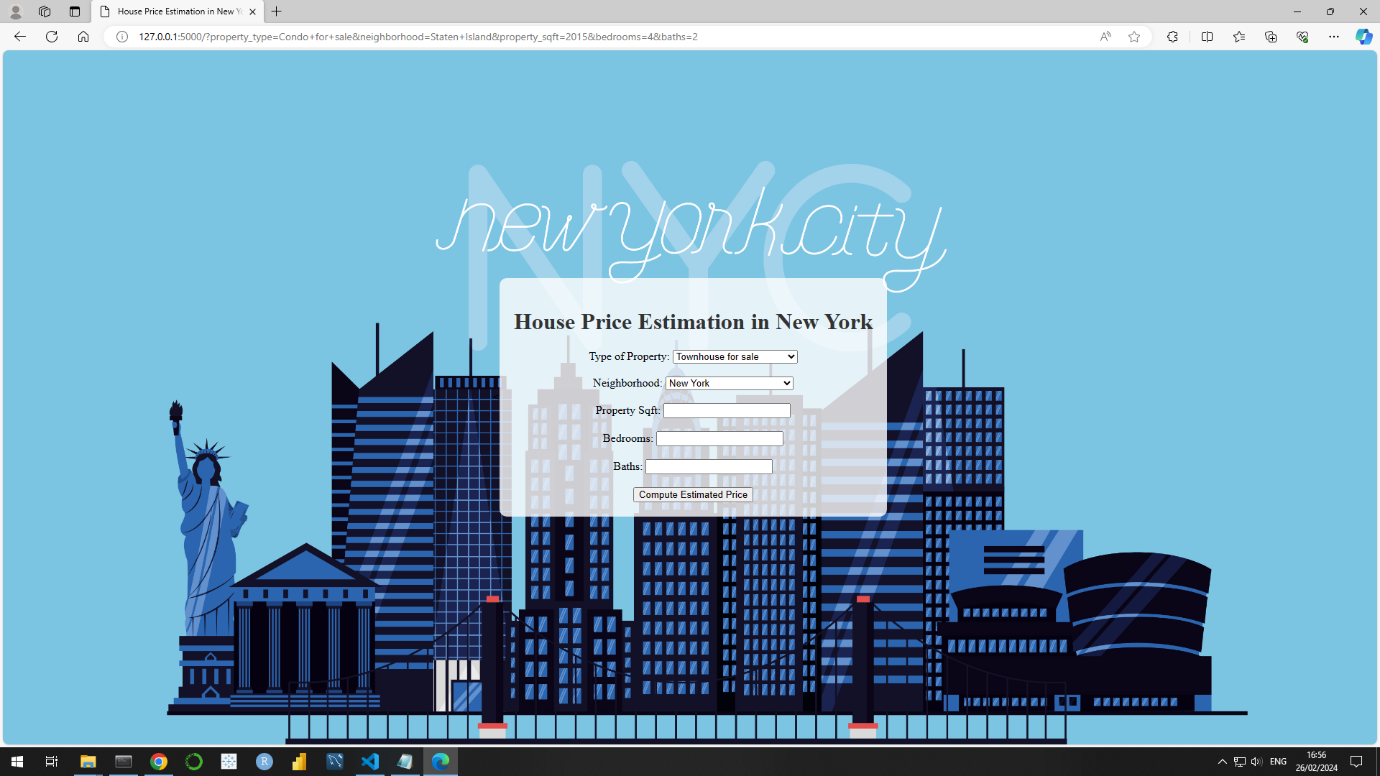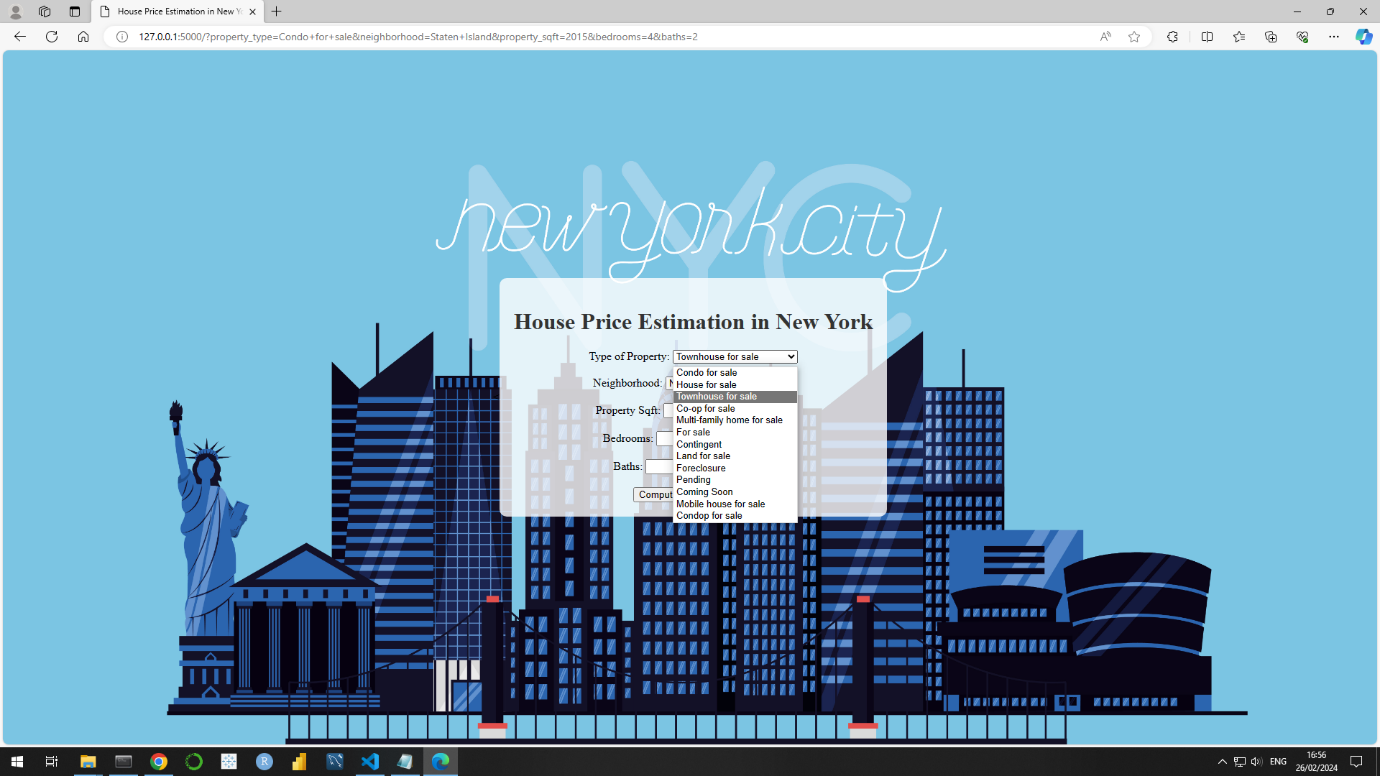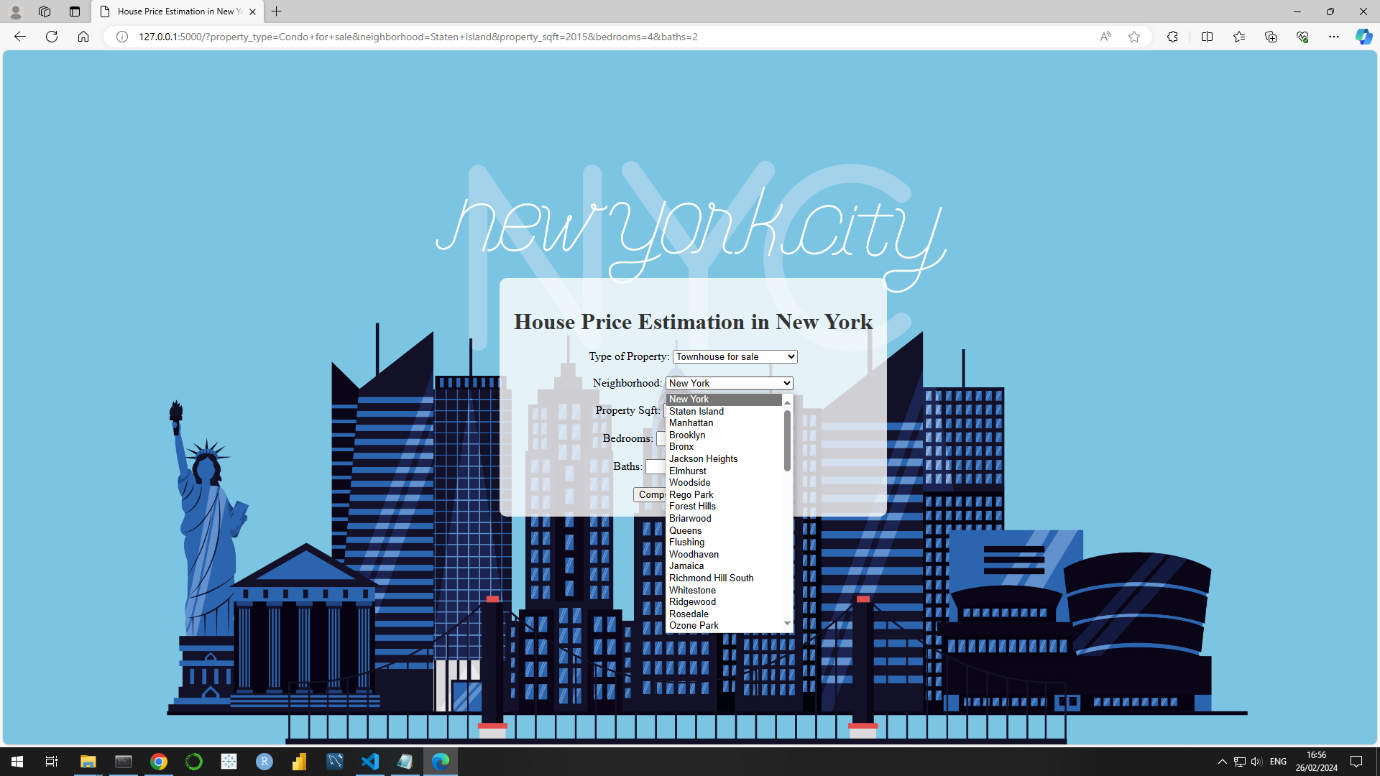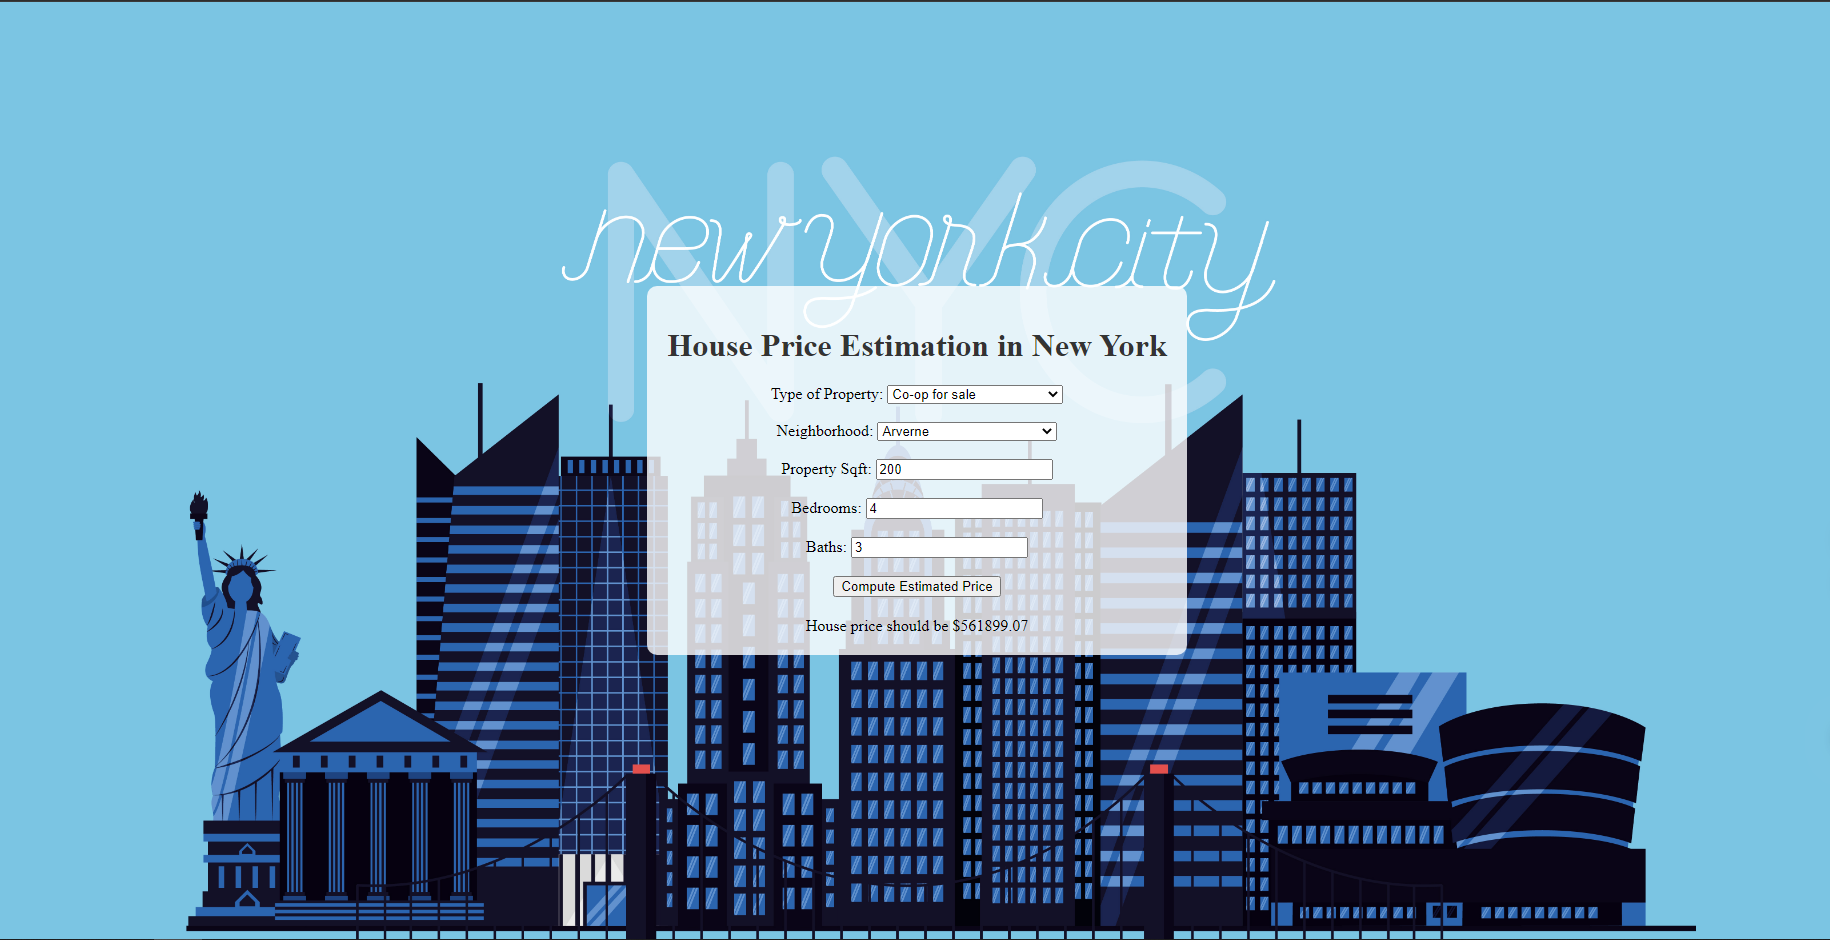